In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#general parameters in SI
G=6.6743e-11 #m^3 kg^-1 s^-2
c=3e8 #m/s
h_t=1.054571817e-34 #kg*m^2*s^-2
m_e=9.1093837015e-31 #kg
m_n=1.674927351e-27 #kg
m_sun=1.98855e30 #kg

#relativistic constant in the eos p=w*e**(4/3)
w = h_t*c/(12*np.pi**2)*(3*np.pi**2*((2*m_n*c**2)**(-1)))**(4/3)

#inverse of gamma
z=3/4


In [6]:
def tov_equations(r, y):
    p, m = y
    if p <= 0:
        return np.array([0, 0])
    e = (p / w)**z
    dmdr = 4 * np.pi * r**2 * e / c**2
    dpdr = -G * e * m / (c**2 * r**2) * (1 + p / e) * (1 + 4 * np.pi * r**3 * p / (m * c**2)) / (1 - 2 * G * m / (c**2 * r))
    return [dpdr, dmdr]


def solve_tov(p_c):
    y0 = [p_c, 1e-6]  
    r_span = (1e-6, 6e6)

    sol = solve_ivp(tov_equations, r_span, y0, method='RK45', max_step=1e3)
    return sol


In [7]:
#pressure in the centre of the white dwarf
p_c=5.62e24
sol = solve_tov(p_c)

#Change units
m_values= sol.y[1]/m_sun
p_values= sol.y[0]
r_values1=sol.t*10**(-3)


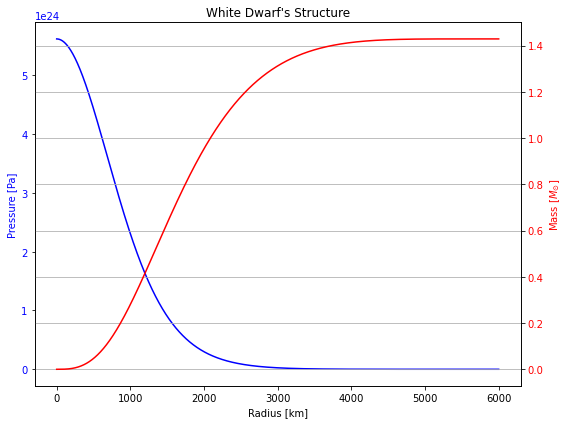

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(r_values1, p_values , 'b-', label="Pressure [Pa]")
ax1.set_xlabel("Radius [km]")
ax1.set_ylabel("Pressure [Pa]", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()  
ax2.plot(r_values1, m_values, 'r-', label="Mass [$M_{\odot}$]")
ax2.set_ylabel("Mass [$M_{\odot}$]", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title("White Dwarf's Structure")
fig.tight_layout()
plt.grid()
plt.show()



In [9]:
#Find radius and mass of the white dwarf (km and M_sun)
for i in range(len(p_values)):
    if p_values[i] <= 0:
        r_stop = r_values1[i]  # White dwarf's radius
        M_star = m_values[i]  # White dwarf's mass
        break  

print(r_stop)
print(M_star)

5711.145622209247
1.4292272583081747
